<a href="https://colab.research.google.com/github/KesteHarshada87/Computer_Vision/blob/main/Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


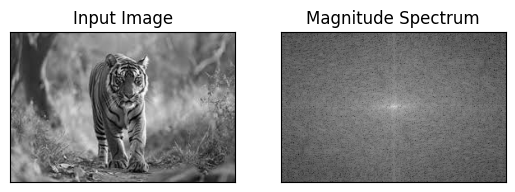

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/ComputerVision/tiger.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img) #convert an image from the spatial domain to the frequency domain using the 2D Fast Fourier Transform (FFT) in NumPy.
fshift = np.fft.fftshift(f) #shifts the zero-frequency component (also called the DC component) of the 2D Fourier transform f to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift)) #used to compute a visually meaningful representation of the frequency spectrum of an image after applying the 2D Fourier Transform

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

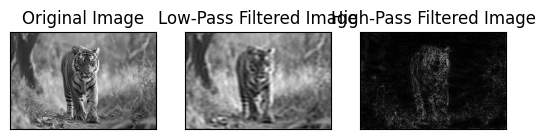

In [8]:
#Apply frequency domain filtering (low pass and high pass)

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/ComputerVision/tiger.jpg', 0) # Read as grayscale

#Perform Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Shift the Zero-Frequency Component to the Center:
dft_shift = np.fft.fftshift(dft)

#Low-Pass Filter (LPF): A circular mask with white inside (allowing low frequencies) and black outside (blocking high frequencies).
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Create a blank mask
mask_lpf = np.zeros((rows, cols, 2), np.uint8)

# Draw a white circle (low-pass filter)
radius_lpf = 30 # Adjust this value for different cutoff frequencies       radius_lpf Radius of the circle = cutoff frequency (e.g., 30 pixels)
cv2.circle(mask_lpf, (ccol, crow), radius_lpf, (1, 1), -1)    #(ccol, crow) Center of the frequency domain (col, row) — center of the image
#(1, 1) Color of the circle. (1, 1) means white in a 2-channel mask (real + imaginary)
#-1 Thickness = -1 means fill the circle (not just border)


#High-Pass Filter (HPF): The inverse of the LPF mask, with black inside (blocking low frequencies) and white outside (allowing high frequencies).
# Create a blank mask
mask_hpf = np.ones((rows, cols, 2), np.uint8)

# Draw a black circle (high-pass filter)
radius_hpf = 30 # Adjust this value
cv2.circle(mask_hpf, (ccol, crow), radius_hpf, (0, 0), -1)

#Apply the Mask to the Shifted DFT:

# For Low-Pass Filter
fshift_lpf = dft_shift * mask_lpf

# For High-Pass Filter
fshift_hpf = dft_shift * mask_hpf

#Perform Inverse Shift and Inverse DFT.

# For Low-Pass Filter
f_ishift_lpf = np.fft.ifftshift(fshift_lpf)
img_back_lpf = cv2.idft(f_ishift_lpf)
img_back_lpf = cv2.magnitude(img_back_lpf[:, :, 0], img_back_lpf[:, :, 1])

# For High-Pass Filter
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_back_hpf = cv2.idft(f_ishift_hpf)
img_back_hpf = cv2.magnitude(img_back_hpf[:, :, 0], img_back_hpf[:, :, 1])

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back_lpf, cmap='gray')
plt.title('Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back_hpf, cmap='gray')
plt.title('High-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()


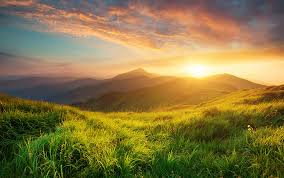

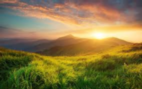

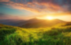

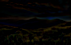

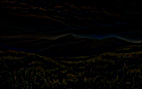

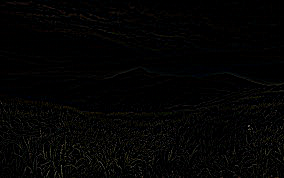

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/drive/MyDrive/ComputerVision/nature.jpg')

gaussian_pyramid = [img]
for i in range(5):  # Create 5 levels (adjust as needed)
    img = cv2.pyrDown(img)
    gaussian_pyramid.append(img)
#Step 1: Initialize the list and add the last level of the Gaussian pyramid.
laplacian_pyramid = [gaussian_pyramid[-1]]
#Step 2: Generate subsequent levels by subtracting expanded versions.
for i in range(len(gaussian_pyramid) - 1, 0, -1):
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i])
    # Ensure sizes match before subtraction, as pyrUp might not perfectly restore original size
    if gaussian_expanded.shape != gaussian_pyramid[i-1].shape:
        gaussian_expanded = cv2.resize(gaussian_expanded, (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0]))

    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)

# Display Gaussian pyramid levelsb
for i, level in enumerate(gaussian_pyramid):
    cv2_imshow(level)

# Display Laplacian pyramid levels
for i, level in enumerate(laplacian_pyramid):
    # For visualization, adjust contrast of Laplacian levels as they can have negative values
    display_laplacian = cv2.convertScaleAbs(level)
    cv2_imshow(display_laplacian)

# cv2.waitKey(0) # Not needed with cv2_imshow
# cv2.destroyAllWindows() # Not needed with cv2_imshow

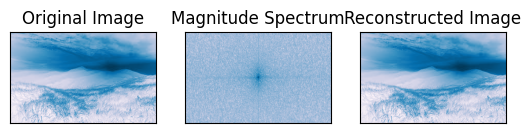

In [25]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load image in grayscale
img = cv.imread('/content/drive/MyDrive/ComputerVision/nature.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Forward FFT and shift zero-frequency component to center
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Magnitude spectrum for visualization
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Inverse shift and inverse FFT to reconstruct image
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)  # get magnitude (real part)

# Plot results
plt.subplot(131), plt.imshow(img, cmap='PuBu')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='PuBu')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_back, cmap='PuBu')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])

plt.show()
